In [ ]:
#Basit Dogrusal Regresyon

In [ ]:
advertising_csv="/content/Advertising.csv"

In [ ]:
import numpy as np
import pandas as pd 


In [ ]:
adv=pd.read_csv(advertising_csv)
df=adv.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()#diger degerler arasindaki iliskileri gözlemleriz. Misal tv-sales(satis) yüksek

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
import seaborn as sns


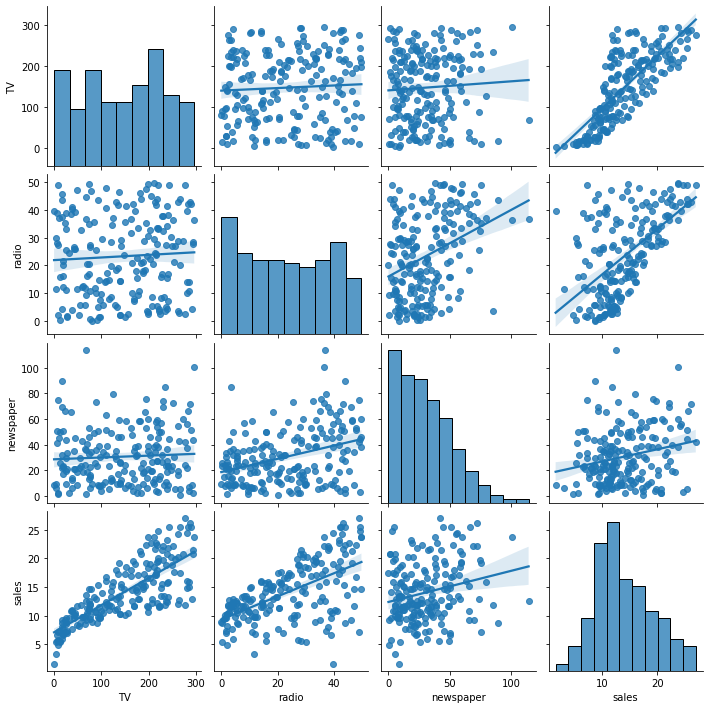

In [ ]:
sns.pairplot(df,kind="reg");

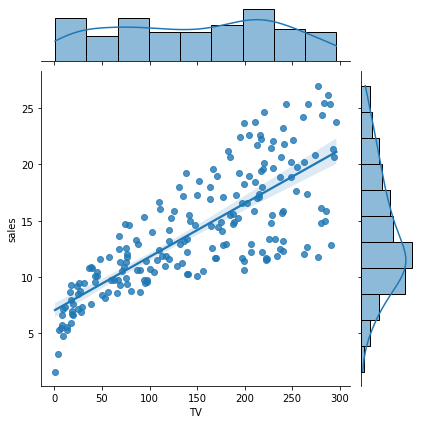

In [ ]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

##Statsmodels ile modelleme

In [ ]:
import statsmodels.api as sm

In [ ]:
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
X=sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
y=df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
lm=sm.OLS(y,X)

In [ ]:
model=lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        20:48:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
lm=smf.ols("sales~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        20:48:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [ ]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
model.f_pvalue

1.4673897001947095e-42

In [ ]:
model.mse_model

3314.6181668686486

In [ ]:
model.rsquared

0.611875050850071

In [ ]:
model.rsquared_adj

0.6099148238341623

In [ ]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [ ]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
print("Sales= "+str("%.3f" % model.params[0]+"+ TV"+"*"+str("%.3f" % model.params[1])))

Sales= 7.033+ TV*0.048


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 28.27)

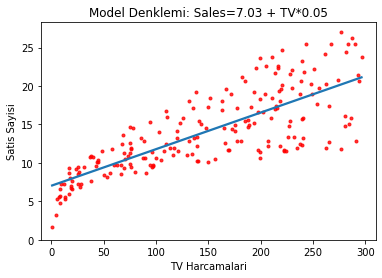

In [ ]:
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales=7.03 + TV*0.05")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [ ]:
from sklearn.linear_model import LinearRegression

x=df[["TV"]]
y=df[["sales"]]

reg=LinearRegression()
model=reg.fit(x,y)

model.intercept_
model.coef_

array([[0.04753664]])

In [ ]:
model.score(x,y)#score modelin r2 degeri

0.611875050850071

In [ ]:
model.predict(x)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [ ]:
model.predict([[30]])#iki tane [[]] önemli

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[8.45869276]])

In [ ]:
yeni_veri=[[5],[90],[200]]
model.predict(yeni_veri)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

#Artiklar ve Makine Ögrenmesindeki Önemi

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
lm=smf.ols("sales~TV",df)
model=lm.fit()

In [ ]:
mse=mean_squared_error(y,model.fittedvalues)
print("Hata Kareler ortalmasi:",mse)

Hata Kareler ortalmasi: 10.512652915656753


In [ ]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546883

In [ ]:
tahmin=reg.predict(x)[0:10]
tahmin

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [ ]:
gercek_deg=y[0:10]
gercek_deg

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


#Coklu Dogrusal Regresyon

In [ ]:
import pandas as pd
ad=pd.read_csv(advertising_csv)
df=ad.copy()
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X=df.drop("sales",axis=1)
y=df["sales"]

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=15)



In [ ]:
X_train.shape

(170, 3)

In [ ]:
X_test.shape

(30, 3)

In [ ]:
y_train.shape

(170,)

In [ ]:
y_test.shape

(30,)

In [ ]:
training=df.copy()

In [ ]:
training.shape

(200, 4)

##Statsmodel

In [ ]:
lm=sm.OLS(y_train,X_train)

In [ ]:
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3145.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                   1.20e-146
Time:                        20:57:00   Log-Likelihood:                         -357.04
No. Observations:                 170   AIC:                                      720.1
Df Residuals:                     167   BIC:                                      729.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0543      0.001     38.510      0.000       0.051       0.057
radio          0.2170      0.010     21.691      0.000       0.197       0.237
newspaper      0.0181      0.007      2.553      0.012       0.004       0.032
==============================================================================
Omnibus:                        8.249   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.865
Skew:                          -0.351   Prob(JB):                      0.00721
Kurtosis:                       3.949   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0543,0.001,38.510,0.000,0.051,0.057
radio,0.2170,0.010,21.691,0.000,0.197,0.237
newspaper,0.0181,0.007,2.553,0.012,0.004,0.032


#Coklu Regresyon Sklearn Ile

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(X_train,y_train)



In [ ]:
model2.intercept_

2.765721723727177

In [ ]:
model2.coef_

array([0.04659045, 0.18452843, 0.00243157])

##Tahmin
* Model Denklemi:
* Sales=2.97 +TV*0.046 + radio*0.16+ newspaper*0.002

* Örnegin 30 birim TV harcamasi, 10 birim radio harcamasi ,40 birimde gazete harcamasi oldugunda satislarin tahmini degeri ne olur?

In [ ]:
yeni_veri=[[30],[10],[40]]

yeni_veri=pd.DataFrame(yeni_veri).T

In [ ]:
yeni_veri

,0,1,2
0,30,10,40


In [ ]:
model2.predict(yeni_veri)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6.10598254])

In [ ]:
rmse=np.sqrt(mean_squared_error(y_train,model2.predict(X_train)))
rmse#egitim hatasi

1.6864762793461627

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,model2.predict(X_test)))
rmse#test hatasi

1.590046729619882

#Model Tuning/Model Dogrulama


In [ ]:
df.head()

In [ ]:
X=df.drop("sales",axis=1)
y=df["sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=99)

lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.723682482265075

In [ ]:
model.score(X_train,y_train)

0.8906288862925659

In [ ]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

0.8853562237979616

In [ ]:
cross_val_score(model,X,y,cv=10,scoring="neg_mean_squared_error")

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])